<a href="https://colab.research.google.com/github/kasalehi/Deep-Learning-With-Tensorflow-/blob/main/MembershipTimeserries_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this work , we are going to make the prediction based on time serries for our base subscriptions in our channel. There are some hyperparametrs which we should consider in order to create the test and train data.
 ## There are following steps we need to do :
  * **windows**: windows is a parametrs which we need to windows the data to make the prediction
  * **horizon**: the numbers of *days* which we are going to predcit

 ## We are going to leverage the Sequentional API in order to make the predcition .

 🎈: Notes: be aware that most time serries are make an affects on bussines in some how, but remebr it doesnt mean that the predcition is almost corrcet .  Some factors like *Seasonality* and also startinga nd ending year or new year might make a big change on time serries . which there are some mthods like **NBeast** which might suits for predictions.

 ##  Apart from all above explanations the following approach is working in some how and we can rely on in some way as long as continuesly still going .🤞


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [45]:
# lets read the data
df=pd.read_csv('data.csv', parse_dates=['Date'], index_col=['Date'])

In [46]:
# lest read the data
df.head()

,Membership Base,Active Membership
Date,,
7/10/2024 0:00,53023,50567
8/10/2024 0:00,53006,50567
9/10/2024 0:00,53005,50534
10/10/2024 0:00,53007,50606
11/10/2024 0:00,52998,50569


In [47]:
x=df.index.to_numpy()
y=df['Membership Base'].to_numpy()

In [8]:
x.shape, y.shape

((357,), (357,))

In [10]:
# now lets make the windows and horizen two main concepts in our staff
windows=7
horizon=1

# create the function to make the tabular train and test data
def make_windows(x, windows=7, horizon=1):
  windows_step=np.expand_dims(np.arange(windows+horizon), axis=0)
  windows_indexs=windows_step + np.expand_dims(np.arange(len(x)-(windows+horizon-1)), axis=0).T
  data=x[windows_indexs]
  train=data[: , :-horizon]
  labels=data[: , -horizon:]
  return train , labels


In [48]:
train, labels=make_windows(y, windows=30, horizon=7)

In [49]:
len(y)

357

In [50]:
# now we have both windows and labels
 ## lets create the test and train parts

size=int(.8 * len(y))
x_train=train[:size]
x_test=train[size:]
train_labels=labels[:size]
test_labels=labels[size:]

In [51]:
# now its time make prediction on data

tf.random.set_seed(42)

model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history=model.fit(
    x_train, train_labels,
    validation_data=(x_test, test_labels),
    epochs=100

)



Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 35770.0156 - mae: 35770.0156 - val_loss: 16816.7070 - val_mae: 16816.7070
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 11025.7354 - mae: 11025.7354 - val_loss: 6451.9258 - val_mae: 6451.9258
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5940.2964 - mae: 5940.2964 - val_loss: 1301.5757 - val_mae: 1301.5757
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2597.1965 - mae: 2597.1965 - val_loss: 522.0004 - val_mae: 522.0004
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1103.9814 - mae: 1103.9814 - val_loss: 1306.0067 - val_mae: 1306.0067
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 975.1367 - mae: 975.1367 - val_loss: 365.4409 - val_mae: 365.4409
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 417.9854 - mae: 417.9854 - val_loss: 74.4041 - val_mae: 74.4041
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 220.6871 - mae: 220.6871 - val_loss: 197.5752 - val_

In [52]:
model.evaluate(x_test, test_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 228.0949 - mae: 228.0949


[225.89418029785156, 225.89418029785156]

In [53]:
y_pred=np.squeeze(model.predict(x_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [54]:
y_pred

array([53246.6  , 53252.25 , 53248.11 , 53240.152, 53244.4  , 53247.367,
       53254.594, 53253.97 , 53254.6  , 53252.01 , 53244.69 , 53233.113,
       53240.734, 53243.203, 53228.48 , 53208.965, 53204.15 , 53186.723,
       53178.188, 53166.67 , 53166.04 , 53147.723, 53132.945, 53131.977,
       53122.938, 53105.277, 53097.13 , 53084.54 , 53066.805, 53061.727,
       53058.793, 53042.73 , 53034.793, 53020.71 , 53014.027, 53010.92 ],
      dtype=float32)

In [55]:
y_pred[-2:]

array([53014.027, 53010.92 ], dtype=float32)

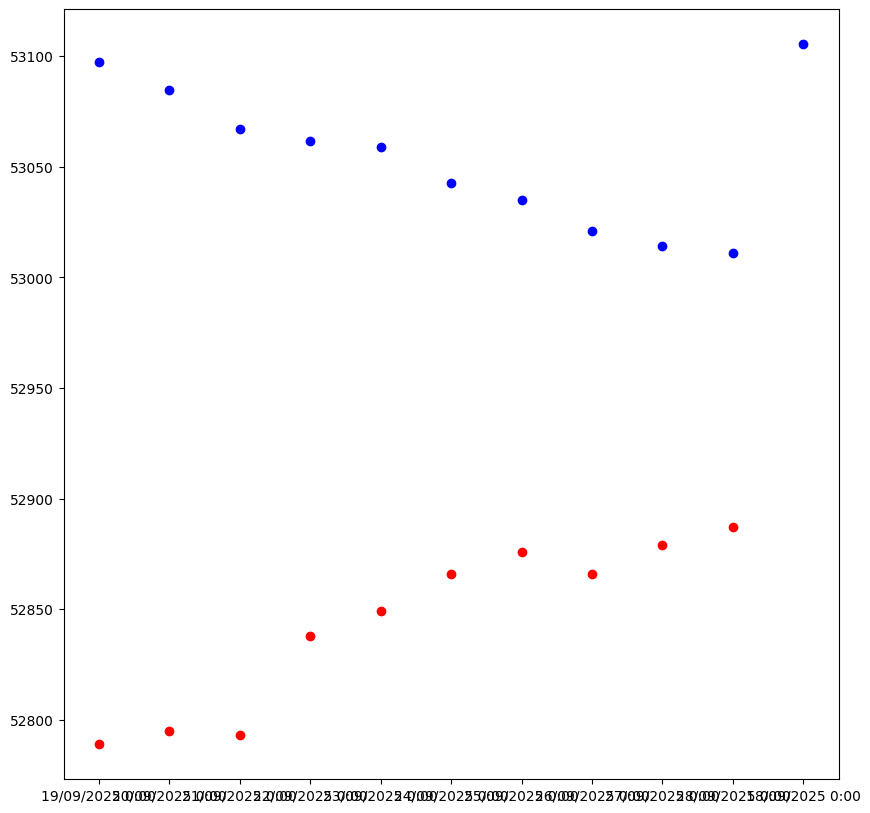

In [56]:
#lets plot the train and test data
plt.figure(figsize=(10,10))
plt.scatter(x[-10:], y[-10:], c='r')
plt.scatter(x[-11:], y_pred[-11:], c='b')
plt.show()

In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         3,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,809 (61.76 KB)

 Trainable params: 5,269 (20.58 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,540 (41.18 KB)

<Axes: >

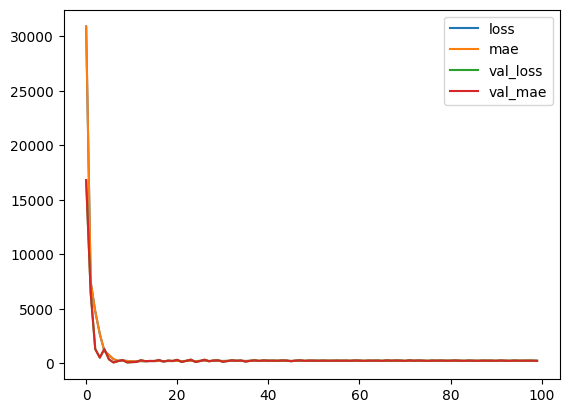

In [60]:
pd.DataFrame(history.history).plot()

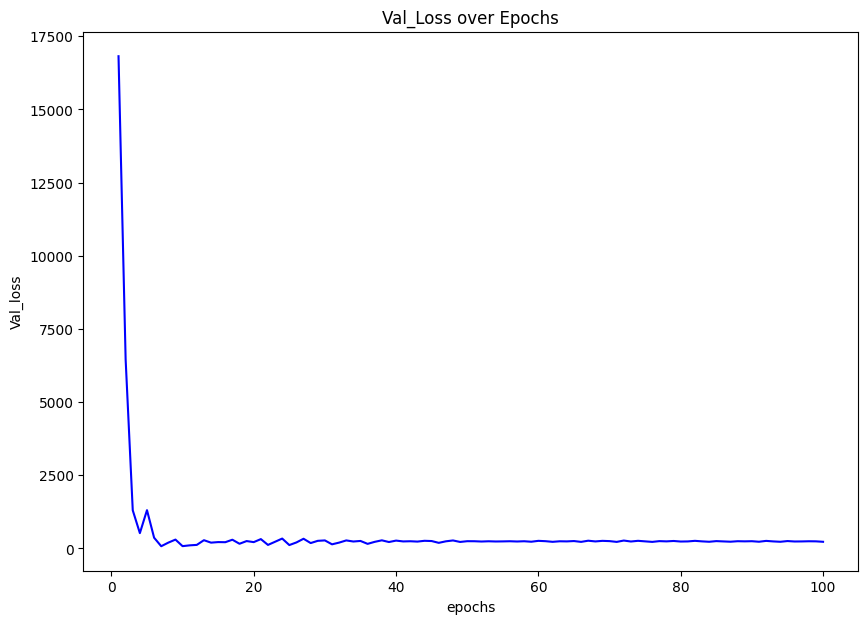

In [78]:
# lets visualize the loss and accuracy
x_axis=np.arange(1, 101)
plt.figure(figsize=(10,7))
plt.plot(x_axis,history.history['val_loss'], c='b')
plt.xlabel('epochs')
plt.ylabel('Val_loss')
plt.title('Val_Loss over Epochs')
plt.show()

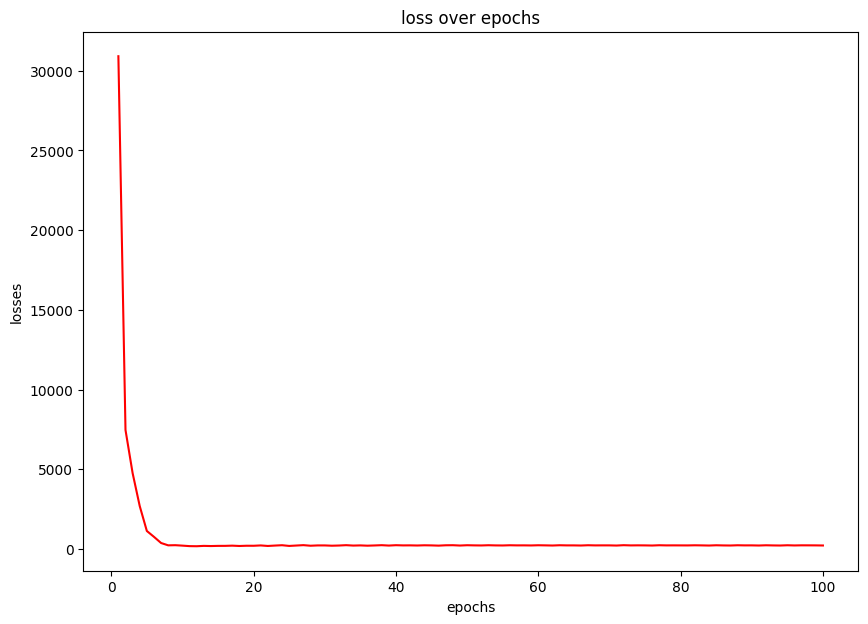

In [79]:
# lets visualize the  accuracy
x_axis=np.arange(1, 101)
plt.figure(figsize=(10,7))
plt.plot(x_axis,history.history['loss'], c='r')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('loss over epochs')
plt.show()